Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB
None

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462    

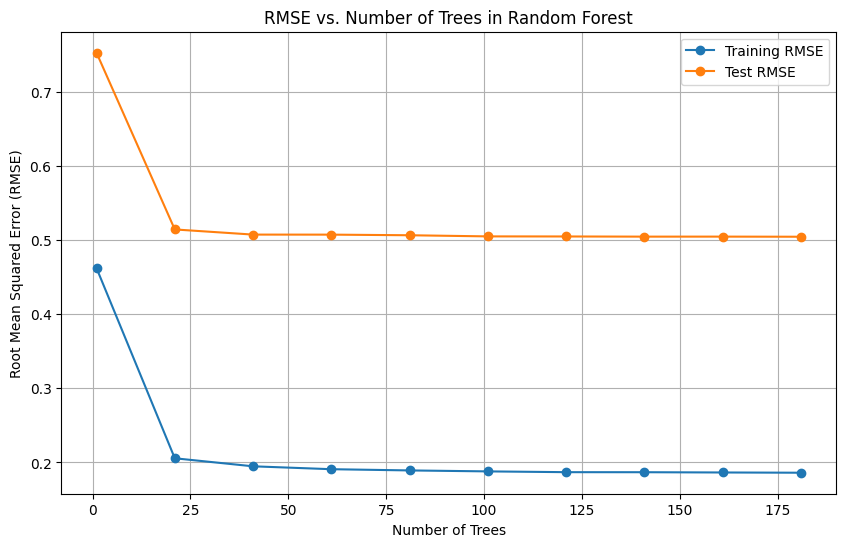

Best number of trees: 181 (Test RMSE: 0.5048)


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the California Housing Dataset
# This dataset contains information about housing districts in California.
# The target variable is the median house value for each district.
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)  # Features
y = california.target  # Target variable (median house value)

# Check the dataset
print("Dataset Info:")
print(X.info())  # Print information about the features
print("\nFirst 5 rows of the dataset:")
print(X.head())  # Print the first 5 rows of the dataset

# Split the data into training and testing sets
# We use 80% of the data for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store RMSE values for training and test sets
train_rmse = []
test_rmse = []

# Vary the number of trees in the Random Forest
# We will test with 1 to 200 trees to observe the effect on overfitting.
n_trees = range(1, 200, 20)  # Test with 1, 21, 41, ..., 181 trees

for n in n_trees:
    # Train a Random Forest Regressor with 'n' trees
    regressor = RandomForestRegressor(n_estimators=n, random_state=42)
    regressor.fit(X_train, y_train)  # Train the model on the training data

    # Make predictions on the training and test sets
    y_train_pred = regressor.predict(X_train)
    y_test_pred = regressor.predict(X_test)

    # Calculate RMSE for training and test sets
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))

# Plot RMSE vs. Number of Trees
plt.figure(figsize=(10, 6))
plt.plot(n_trees, train_rmse, label='Training RMSE', marker='o')
plt.plot(n_trees, test_rmse, label='Test RMSE', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('RMSE vs. Number of Trees in Random Forest')
plt.legend()
plt.grid(True)
plt.show()

# Print the best number of trees (minimum test RMSE)
best_n_trees = n_trees[np.argmin(test_rmse)]
print(f"Best number of trees: {best_n_trees} (Test RMSE: {min(test_rmse):.4f})")